# Countries dataset

This is the very first analysis, using Python, on the countries of the world dataset. Because it is the first, this exercise will include the main cleaning methods needed for the original dataset. There will also be exploration of the data, so that we understand what we are cleaning, and to understand the columns better before further analysis can be done. We also finally conduct clustering, and will compare this clustering of countries based on the columns (geographic, economic, demographic) to see if it resembles the 'Region' classification that is given in the data. 

* Exploration
* Cleaning
* Visualisation
* Manipulation (e.g. creating new columns)
* Clustering 

### Explore countries dataset, find interesting correlation, visualisations, models

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
import os
print(os.getcwd())
os.chdir('/kaggle/input')
print(os.listdir())

/kaggle/input
['countries-of-the-world', 'cleaned-countriescsv']


## The data

In [97]:
countries = pd.read_csv("/kaggle/input/countries-of-the-world/countries of the world.csv") ## remember to remove the extra unnecessary column when reading 


In [98]:
## Take a preview at the data
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### Countries population and area

In [99]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

The column names are unfriendly and difficult to remember - let us simplify them

# Cleaning the column names 

We will remove the brackets and the text inside them. We will also replace whitespaces or spaces between words with an underscore for good practice.

In [100]:
import re 

## Remove all brackets and everything inside them 
new_col_names = [re.sub(r' \(.*\)', '', columnnames) for columnnames in countries.columns]
## Replace spaces with underscores for better practice
new_col_names = [re.sub(" ", "_", columnnames)for columnnames in new_col_names]

## Use the result as new column names 
countries.columns = new_col_names

## Check
countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop._Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

The global population mean is  28.74  million


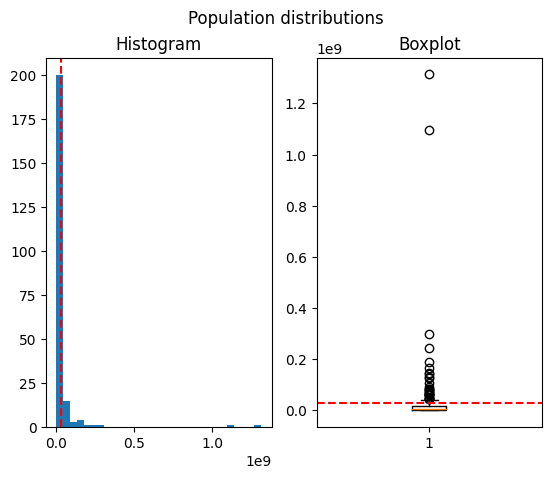

In [101]:
population = countries.Population
pop_mean = population.mean()
print("The global population mean is ", round(pop_mean/1e6, 3), " million")

## First plot: histogram
plt.subplot(1,2,1)
plt.hist(population, bins = 30)
plt.axvline(pop_mean, color = 'red', linestyle = 'dashed')
plt.title("Histogram")

## Second plot: boxplot
plt.subplot(1,2,2)
plt.boxplot(population)
plt.axhline(pop_mean, color = 'red', linestyle = 'dashed')
plt.title("Boxplot")


plt.suptitle("Population distributions")
plt.show()

There is very strong evidence of right skewness in the populations of the world. Most notably, there are two that stand out from the rest. Let us try to quantify the skewness of the distribution, and see the two countries that are much higher than the rest of them

Below, we get the quantitative summary of the distribution. We can see that the population ranges from the smallest at 7 thousand, to the highest at 1.3 billion. The median is about 4.7 million, which is quite small, suggesting that a lot of countries have quite a small population (at least half of the countries are in the low millions and below). 

We have also plotted the average, marked by the red line, which shows a value closer to the mass of the population points despite the presence of two large anomalies. 

We repeat for area.

The global area mean is  0.598  million


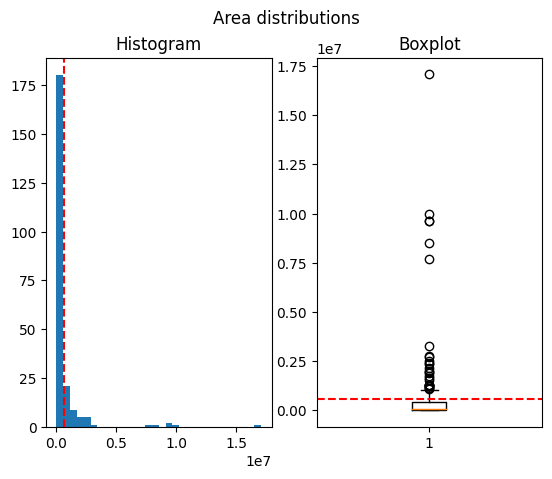

In [102]:
area = countries.Area
area_mean = area.mean()
print("The global area mean is ", round(area_mean/1e6, 3), " million")

## First plot: histogram
plt.subplot(1,2,1)
plt.hist(area, bins = 30)
plt.axvline(area_mean, color = 'red', linestyle = 'dashed')
plt.title("Histogram")

## Second plot: boxplot
plt.subplot(1,2,2)
plt.boxplot(area)
plt.axhline(area_mean, color = 'red', linestyle = 'dashed')
plt.title("Boxplot")


plt.suptitle("Area distributions")
plt.show()

# See some summary statistics on Population and Area

In [103]:
print(countries.Population.describe())
print("\n =================== \n")
print(countries.Area.describe())


count    2.270000e+02
mean     2.874028e+07
std      1.178913e+08
min      7.026000e+03
25%      4.376240e+05
50%      4.786994e+06
75%      1.749777e+07
max      1.313974e+09
Name: Population, dtype: float64


count    2.270000e+02
mean     5.982270e+05
std      1.790282e+06
min      2.000000e+00
25%      4.647500e+03
50%      8.660000e+04
75%      4.418110e+05
max      1.707520e+07
Name: Area, dtype: float64


# Let us look at the anomalies in terms of populations -- which countries have abnormally high populations?

In [104]:
high_pop_countries = countries[countries.Population > 1e9]
print(high_pop_countries)

   Country                         Region  Population     Area Pop._Density  \
42  China   ASIA (EX. NEAR EAST)           1313973713  9596960        136,9   
94  India   ASIA (EX. NEAR EAST)           1095351995  3287590        333,2   

   Coastline Net_migration Infant_mortality     GDP Literacy Phones Arable  \
42      0,15          -0,4            24,18  5000.0     90,9  266,7   15,4   
94      0,21         -0,07            56,29  2900.0     59,5   45,4   54,4   

   Crops  Other Climate Birthrate Deathrate Agriculture Industry Service  
42  1,25  83,35     1,5     13,25      6,97       0,125    0,473   0,403  
94  2,74  42,86     2,5     22,01      8,18       0,186    0,276   0,538  


Let us get a rank of the high population countries, limit 5, in both ascending and descending order to see the extreme countries in terms of population

# Ranking countries by populations -- smallest and largest populations

In [105]:
countries.sort_values("Population", ascending=True).head(5)[['Country', 'Pop._Density','Region', 'Population', 'Area']]


,Country,Pop._Density,Region,Population,Area
174,St Pierre & Miquelon,"29,0",NORTHERN AMERICA,7026,242
171,Saint Helena,"18,2",SUB-SAHARAN AFRICA,7502,413
140,Montserrat,"92,5",LATIN AMER. & CARIB,9439,102
209,Tuvalu,"454,2",OCEANIA,11810,26
144,Nauru,"632,7",OCEANIA,13287,21


The countries with the smallest populations also have very small areas in terms of square miles. Look below to see how much larger the countries with biggest populations are. 

In [106]:
countries.sort_values("Population", ascending=False).head(5)[['Country', 'Population', 'Pop._Density', 'Population', 'Area']]



,Country,Population,Pop._Density,Population,Area
42,China,1313973713,"136,9",1313973713,9596960
94,India,1095351995,"333,2",1095351995,3287590
214,United States,298444215,"31,0",298444215,9631420
95,Indonesia,245452739,"127,9",245452739,1919440
27,Brazil,188078227,"22,1",188078227,8511965


# Correlation between area and population -- do geographically larger countries have bigger populations? More land = more people?

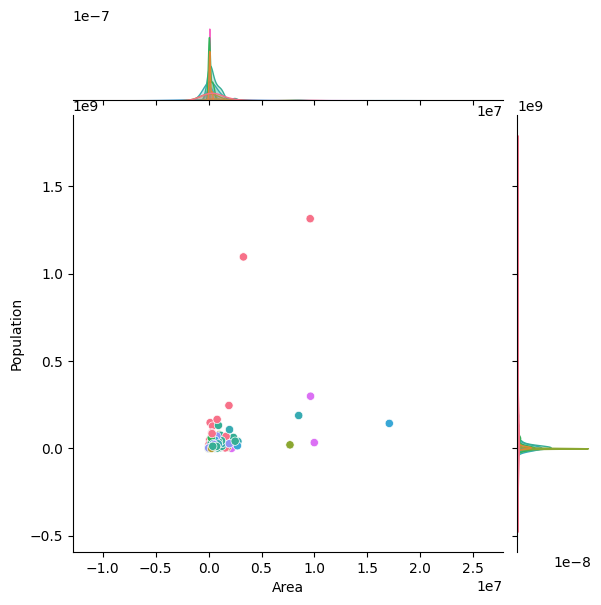

In [107]:
import seaborn as sns

sns.jointplot(data = countries,
              x = 'Area',
              y = 'Population',  
              hue = 'Region',
              legend = False)


The relationship becomes hard to pin point as area and as population increases to the extreme ends. We can check for these anomalies (area, population) and see what they are, and remove them to see if there is a clearer linear relationship 

In [108]:
## Outliers/ high area and population points
area_outliers = countries[(countries.Area > 0.5e7) ] ## use condition
pop_outliers = countries[(countries.Population > 1e9)]
area_outliers['outlier'] = 'area_outlier' ## set a new column to indicate what kind of
## outlier -- here, it is an area outlier
pop_outliers['outlier'] = 'pop_outlier'

## Combine the datasets to form one outlier dataset
area_pop_outliers = pd.concat([area_outliers, pop_outliers], axis = 0)
area_pop_outliers["Area_per_mil"] = area_pop_outliers.Area/1e6
area_pop_outliers["Pop_per_mil"] = area_pop_outliers.Population/1e6



/tmp/ipykernel_32/1007607472.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area_outliers['outlier'] = 'area_outlier' ## set a new column to indicate what kind of
/tmp/ipykernel_32/1007607472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_outliers['outlier'] = 'pop_outlier'


In [109]:
area_pop_outliers[['Country', "Area_per_mil", "Pop_per_mil", "outlier"]].sort_values(['Area_per_mil', 'Pop_per_mil'])

,Country,Area_per_mil,Pop_per_mil,outlier
94,India,3.287590,1095.351995,pop_outlier
11,Australia,7.686850,20.264082,area_outlier
27,Brazil,8.511965,188.078227,area_outlier
42,China,9.596960,1313.973713,area_outlier
42,China,9.596960,1313.973713,pop_outlier
214,United States,9.631420,298.444215,area_outlier
36,Canada,9.984670,33.098932,area_outlier
169,Russia,17.075200,142.893540,area_outlier


China is the only country that is both an area and population outlier

Let us remove these outliers and plot the joint plot again

In [110]:
countries_no_pop_area_outliers = countries[(countries.Population < 1e9) & (countries.Area < 0.5e7)]

## Replot Population vs Area (without anomalies)

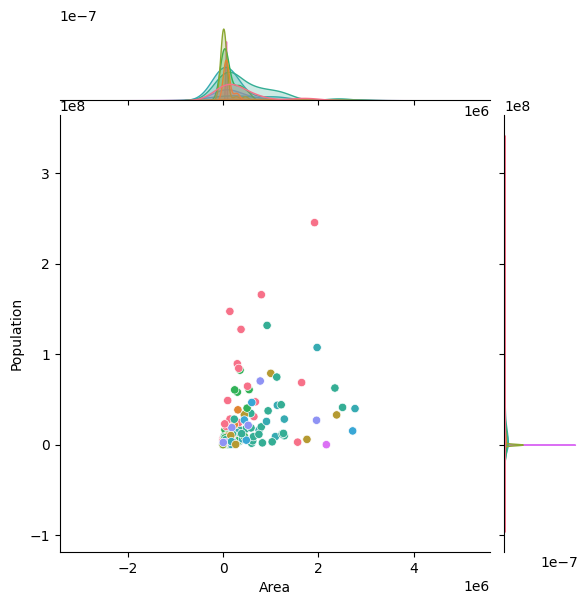

In [111]:
sns.jointplot(data = countries_no_pop_area_outliers,
              x = 'Area',
              y = 'Population',  
              hue = 'Region',
              legend = False)


Even after removing the initial outliers, we can still see strong heteroskedasticity whereby population varies a lot more when area increases. Most of area and population is also strongly concentrated around a relatively small value of area and population.

As mentioned, let us find the skewness of the marginal distributions. 

In [112]:
from scipy.stats import skew

pop_skewness = round(skew(countries.Population), 3)
area_skewness = round(skew(countries.Area), 3)

print("Population and area skewness are ", pop_skewness,' and ', area_skewness, ' respectively')

Population and area skewness are  9.139  and  5.925  respectively


As we can see, both are very much right skewed (normal distribution has 0 skewness). Skewness measures the extent of asymmetry, and here we see that population is much more right skewed than area, probability due to population giants China and India.

In [113]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop._Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GDP', 'Literacy', 'Phones',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

### Countries Coastline

In [114]:
countries.Coastline.describe()

count      227
unique     151
top       0,00
freq        44
Name: Coastline, dtype: object

We can already see that this is a mixed distribution: there are entries with 0 and non-0 values. The 0s refer to landlocked countries that logically have no coastline. This thus could be a zero-inflated distribution. 

We can also see that the data may not be saved as numeric and thus need some cleaning

In [115]:
print(countries.Coastline.dtype)
## Check if contents are numeric

object


In [116]:
print(countries.Coastline)
print("Coastline == 0,00", "=======================")
print(countries[countries.Coastline == '0,00'].head()[['Country', 'Coastline']])
print("Coastline == 58,29", "=======================")
print(countries[countries.Coastline == '58,29'][['Country', 'Coastline']])
print("Coastline == 0,42", "=======================")
print(countries[countries.Coastline == '0,42'][['Country', 'Coastline']])

0       0,00
1       1,26
2       0,04
3      58,29
4       0,00
       ...  
222     0,00
223     0,42
224     0,36
225     0,00
226     0,00
Name: Coastline, Length: 227, dtype: object
Coastline == 0,00 =======================
         Country Coastline
0   Afghanistan       0,00
4       Andorra       0,00
9       Armenia       0,00
12      Austria       0,00
13   Azerbaijan       0,00
Coastline == 58,29 =======================
           Country Coastline
3  American Samoa      58,29
Coastline == 0,42 =======================
             Country Coastline
70    French Guiana       0,42
223  Western Sahara       0,42


American Samoa has a high value of 58,29, while a country like Austia has 0,00. French Guiana is in between with 0,42. 

Below are images from Google of the maps of American Somoa, French Guiana and Austria respectively.

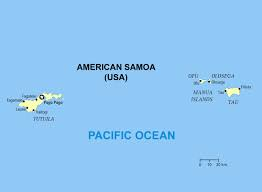

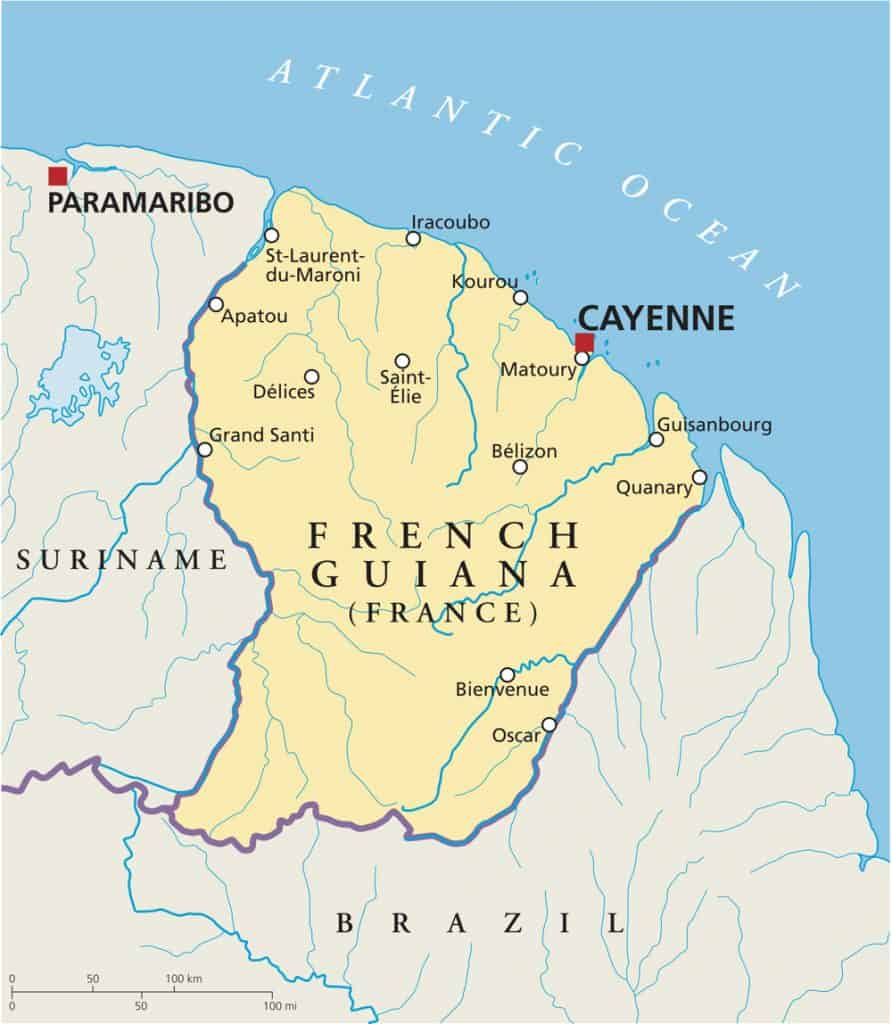

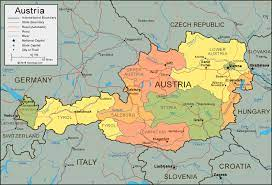

We need to clean the coastline column and remove the comma in the entries that is causing the data to be read incorrectly as an object. 

In [117]:
## Clean up Coastline variable 
countries.Coastline
countries['Coastline'] = pd.to_numeric(countries.Coastline.str.replace(",", ""))

In [118]:
## Check 
countries.Coastline.describe() ## Ok now

count      227.000000
mean      2116.533040
std       7228.686315
min          0.000000
25%         10.000000
50%         73.000000
75%       1034.500000
max      87066.000000
Name: Coastline, dtype: float64

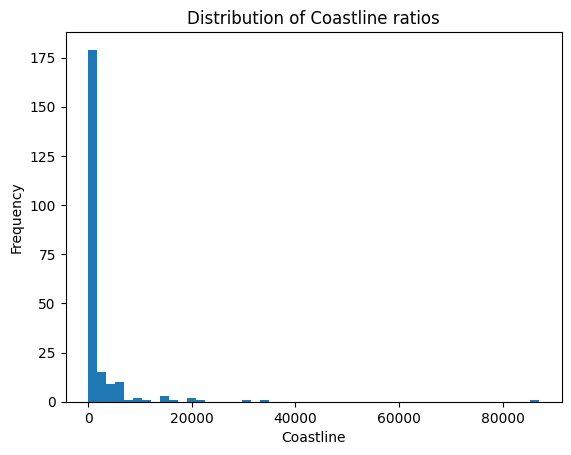

In [119]:
countries.Coastline.plot(kind = 'hist', bins = 50)
plt.xlabel("Coastline")
plt.title("Distribution of Coastline ratios")
plt.show()

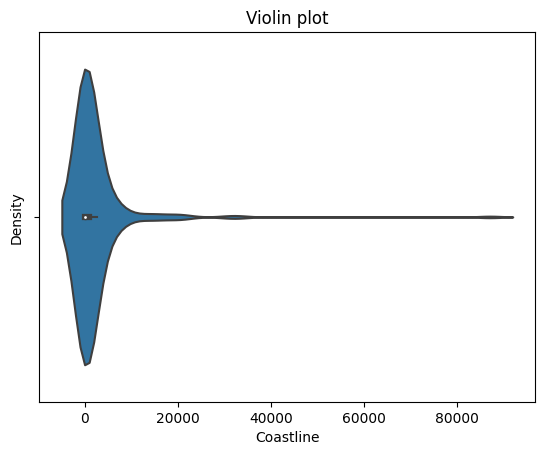

In [120]:
sns.violinplot(data = countries, x = 'Coastline')
plt.title('Violin plot')
plt.ylabel("Density")
plt.show()

Text(0.5, 1.0, 'Landlocked?')

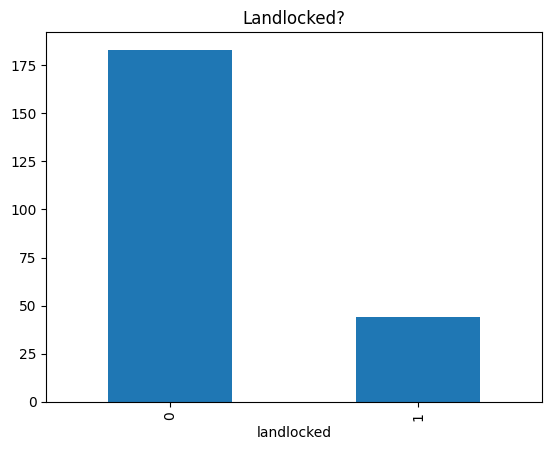

In [121]:
countries['landlocked'] = (countries.Coastline == 0).astype(int)

## Check
countries.landlocked.value_counts().plot(kind = 'bar')
plt.title("Landlocked?")

Let us get more granularity -- see landlockedness by region


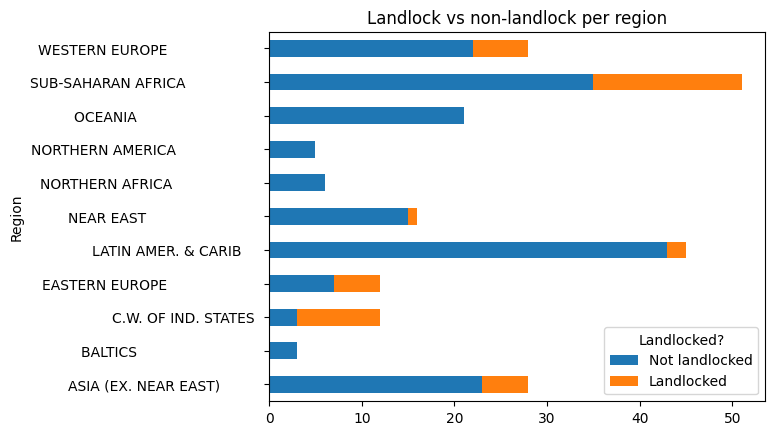

In [122]:
landlock_avg_by_region = countries.groupby("Region")['landlocked'].mean().reset_index().sort_values("landlocked", ascending=False)
landlock_count_by_region = countries.groupby("Region")['landlocked'].value_counts()

## Unstack to convert to dataframe 
landlock_count_by_region_df = landlock_count_by_region.unstack()

## Plot 
landlock_count_by_region_df.plot(kind = 'barh', ## horizontal bars 
                                 stacked=True)
plt.title("Landlock vs non-landlock per region")
plt.legend(title = 'Landlocked?', labels = ['Not landlocked', 'Landlocked'])

### Does coastline affect GDP?

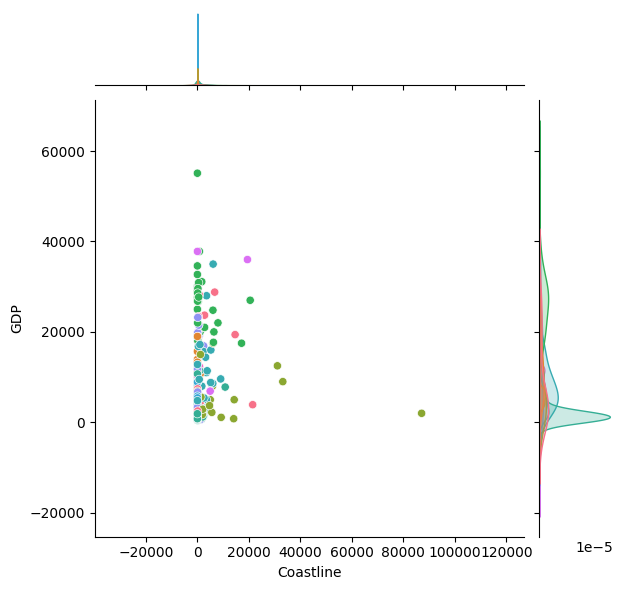

In [123]:
sns.jointplot(data = countries,
              y = 'GDP',
              x = 'Coastline', 
              hue = 'Region',
              legend = False)


<Axes: xlabel='landlocked', ylabel='GDP'>

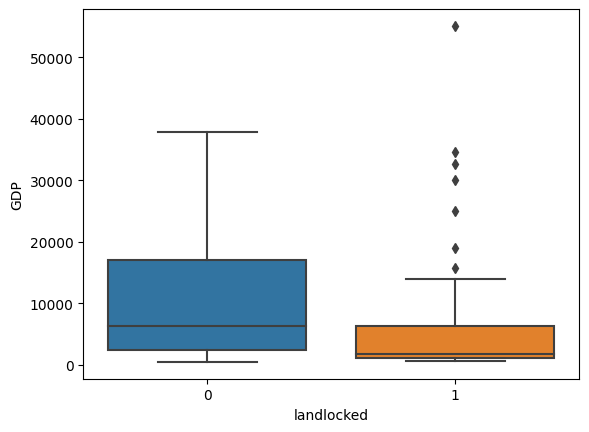

In [124]:
## Landlock vs GDP

sns.boxplot(data = countries,
            x = 'landlocked',
            y = 'GDP')

## Cleaning: changing data types, mean imputation

Text(0.5, 1.0, 'Missing values by columns')

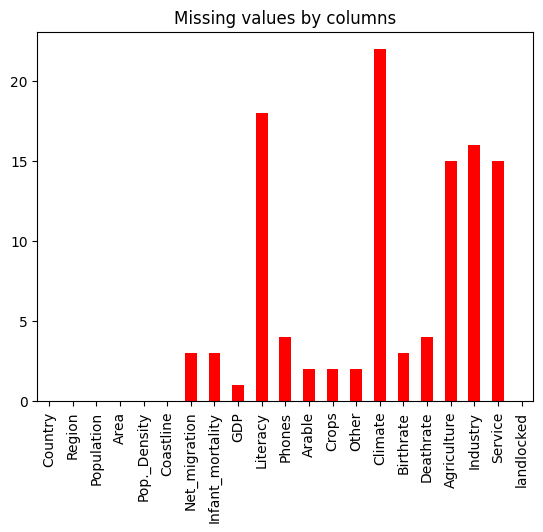

In [125]:
countries.isnull().sum().plot(kind = 'bar', color = 'red')
plt.title('Missing values by columns')

In [126]:
missing_df = countries.isnull()
missing_df

missing_by_region = missing_df.groupby(countries['Region']).sum()
missing_by_region

,Country,Region,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked
Region,,,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
BALTICS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
C.W. OF IND. STATES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
EASTERN EUROPE,0,0,0,0,0,0,0,0,0,3,...,0,0,0,3,1,1,0,0,0,0
LATIN AMER. & CARIB,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,2,2,0
NEAR EAST,0,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
NORTHERN AFRICA,0,0,0,0,0,0,1,1,1,1,...,0,0,0,2,1,1,1,1,0,0
NORTHERN AMERICA,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,0,0,2,2,2,0
OCEANIA,0,0,0,0,0,0,2,2,0,4,...,0,0,0,0,1,2,5,5,5,0


In [127]:
missing_by_region.sum(axis = 1).sort_values(ascending=False)

Region
OCEANIA                                26
WESTERN EUROPE                         26
SUB-SAHARAN AFRICA                     13
NORTHERN AFRICA                        11
NORTHERN AMERICA                        9
EASTERN EUROPE                          8
LATIN AMER. & CARIB                     8
NEAR EAST                               4
ASIA (EX. NEAR EAST)                    2
C.W. OF IND. STATES                     2
BALTICS                                 1
dtype: int64

Surprisingly, the most number of NAs come from Western Europe and Oceania. 

### Mean imputation

We move forward by imputing the mean of each region for each variable that is missing for a particular country. 

In [128]:
print(countries.dtypes)
for col in countries.columns:
    print(countries[col].dtype)

Country              object
Region               object
Population            int64
Area                  int64
Pop._Density         object
Coastline             int64
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones               object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
landlocked            int64
dtype: object
object
object
int64
int64
object
int64
object
object
float64
object
object
object
object
object
object
object
object
object
object
object
int64


'object' usually refers to strings, while what we should be expecting are integers or floats. 

In [129]:
## Check if numeric via apply method
countries.apply(lambda s : pd.to_numeric(s, errors = 'coerce')).notnull().all()
## coerce: if the conversion to numeric fails, ten the values in the column will 
## replaced by NaN values rather than raising an error 
## not null: changes the NaN to false for NaN 
## all: checks if all the values in the column are not numeric or if they all are

Country             False
Region              False
Population           True
Area                 True
Pop._Density        False
Coastline            True
Net_migration       False
Infant_mortality    False
GDP                 False
Literacy            False
Phones              False
Arable              False
Crops               False
Other               False
Climate             False
Birthrate           False
Deathrate           False
Agriculture         False
Industry            False
Service             False
landlocked           True
dtype: bool

We can see that indeed most of the variables are not numeric and we have to change them

In [130]:
non_numeric_cols = countries.columns[~countries.apply(lambda s: pd.to_numeric(s, errors = 'coerce')).notnull().all()]
countries[non_numeric_cols]

,Country,Region,Pop._Density,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),"48,0","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,"124,6","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,"13,8","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,"290,4","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,"152,1","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,"419,9","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,"1,0",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,"40,6",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,"15,3",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


They suffer from the same issue as Coastline - hence we have to first remove the commas then apply the to_numeric function 

We exclude country and region since they are indeed categorical and not meant to be numeric 

In [131]:
## Remove Country and Region columns from non-numeric subset
non_numeric_cols_only = non_numeric_cols[3:].tolist()
non_numeric_cols_only = [col for col in non_numeric_cols if col not in ['Coastline'] ]

In [132]:
for col in non_numeric_cols_only:
    print(countries[col].dtype)

object
object
object
object
object
float64
object
object
object
object
object
object
object
object
object
object
object


We can see that using the to_numeric method with coercing errors was not accurate in flagging out the non-numeric columns. 

We now check for them instead by checking if their dtype is 'object'

In [133]:
object_columns = countries.select_dtypes(include=['object']).columns ## select columns based on dtype
print(object_columns)

## Remove country and region 
object_columns = object_columns.drop(['Country', 'Region'])
print(object_columns)

Index(['Country', 'Region', 'Pop._Density', 'Net_migration',
       'Infant_mortality', 'Literacy', 'Phones', 'Arable', 'Crops', 'Other',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service'],
      dtype='object')
Index(['Pop._Density', 'Net_migration', 'Infant_mortality', 'Literacy',
       'Phones', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [134]:
## Turn columns that are supposed to be numeric into numeric types 
for col in object_columns:
    countries[col] = pd.to_numeric(countries[col].str.replace(",", ""))

In [137]:
## Check that everything has been made to numeric
countries.drop(columns = 'Country').groupby('Region').mean()

,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked
Region,,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,12648.250000,1792.678571,149.142857,3784.892857,8053.571429,795.535714,1711.592593,1266.035714,330.892857,7161.392857,3.296296,1688.285714,722.892857,124.285714,231.750000,386.714286,0.178571
BALTICS,2.394991e+06,5.833833e+04,398.333333,311.666667,-203.333333,810.333333,11300.000000,997.333333,2928.666667,3031.000000,61.000000,6908.000000,3.000000,934.333333,1263.000000,21.000000,293.333333,475.666667,0.000000
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,567.083333,9.333333,-131.333333,3907.750000,4000.000000,987.250000,1638.500000,1475.916667,180.500000,7217.083333,4.800000,1364.833333,969.666667,192.000000,299.500000,411.916667,0.750000
EASTERN EUROPE,9.992893e+06,9.601850e+04,1009.000000,103.500000,-67.000000,1268.666667,9808.333333,970.888889,2807.500000,2633.250000,219.083333,6658.750000,3.111111,949.545455,1028.454545,83.166667,283.000000,509.416667,0.416667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,1362.022222,1597.222222,-138.244444,1854.866667,8682.222222,906.545455,2716.613636,895.688889,428.755556,7167.777778,2.933333,1777.511111,613.000000,57.953488,170.720930,409.813953,0.044444
NEAR EAST,1.219177e+07,2.722241e+05,4270.812500,360.250000,256.000000,1991.812500,10456.250000,795.214286,2091.133333,956.937500,510.562500,7196.375000,1.666667,2403.062500,388.125000,48.062500,343.562500,418.625000,0.062500
NORTHERN AFRICA,2.690119e+07,1.003148e+06,389.333333,31.833333,-43.200000,2035.000000,5460.000000,672.400000,1002.000000,743.500000,280.500000,7950.000000,1.500000,2081.400000,480.600000,135.000000,307.400000,283.500000,0.000000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,2608.600000,4964.000000,-27.400000,745.800000,26100.000000,977.500000,6867.400000,746.600000,4.800000,5288.600000,2.000000,1110.200000,629.000000,8.000000,166.333333,520.000000,0.000000
OCEANIA,1.577698e+06,4.057053e+05,1311.809524,10788.571429,-150.631579,2020.368421,8247.619048,888.352941,1898.857143,543.857143,1273.952381,5352.761905,2.000000,2106.850000,517.105263,115.500000,169.687500,473.375000,0.000000


In [138]:
## Impute means

## Get numeric columns by testing if they can turn to numeric 
numeric_cols = countries.columns[~countries.apply(pd.to_numeric, errors = 'coerce').isnull().all()]

## Iterate through the numeric columns 
for col in numeric_cols:
    print(col)
    countries[col] = countries.groupby('Region')[col].transform(lambda x: x.fillna(x.mean()))


Population
Area
Pop._Density
Coastline
Net_migration
Infant_mortality
GDP
Literacy
Phones
Arable
Crops
Other
Climate
Birthrate
Deathrate
Agriculture
Industry
Service
landlocked


In [139]:
## Check that imputation has been done 
countries.isnull().sum()

Country             0
Region              0
Population          0
Area                0
Pop._Density        0
Coastline           0
Net_migration       0
Infant_mortality    0
GDP                 0
Literacy            0
Phones              0
Arable              0
Crops               0
Other               0
Climate             0
Birthrate           0
Deathrate           0
Agriculture         0
Industry            0
Service             0
landlocked          0
dtype: int64

We have successfully imputed the means for all regions 

In [140]:
countries.shape

(227, 21)

## Clustering!

In [141]:
## Get the relevant libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

We check for multicollinearity, to see if there are any columns we can reduce to make the task simplier

In [142]:
numeric_data_subset = countries[numeric_cols]
numeric_data_subset.head()

,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked
0,31056997,647500,480,0,2306.0,16307.0,700.0,360.0,32.0,1213.0,22.0,8765.0,1.0,466.0,2034.0,38.0,24.000000,38.000,1
1,3581655,28748,1246,126,-493.0,2152.0,4500.0,865.0,712.0,2109.0,442.0,7449.0,3.0,1511.0,522.0,232.0,188.000000,579.000,0
2,32930091,2381740,138,4,-39.0,31.0,6000.0,700.0,781.0,322.0,25.0,9653.0,1.0,1714.0,461.0,101.0,6.000000,298.000,0
3,57794,199,2904,5829,-2071.0,927.0,8000.0,970.0,2595.0,10.0,15.0,75.0,2.0,2246.0,327.0,115.5,169.687500,473.375,0
4,71201,468,1521,0,66.0,405.0,19000.0,1000.0,4972.0,222.0,0.0,9778.0,3.0,871.0,625.0,18.2,159.458333,492.625,1


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


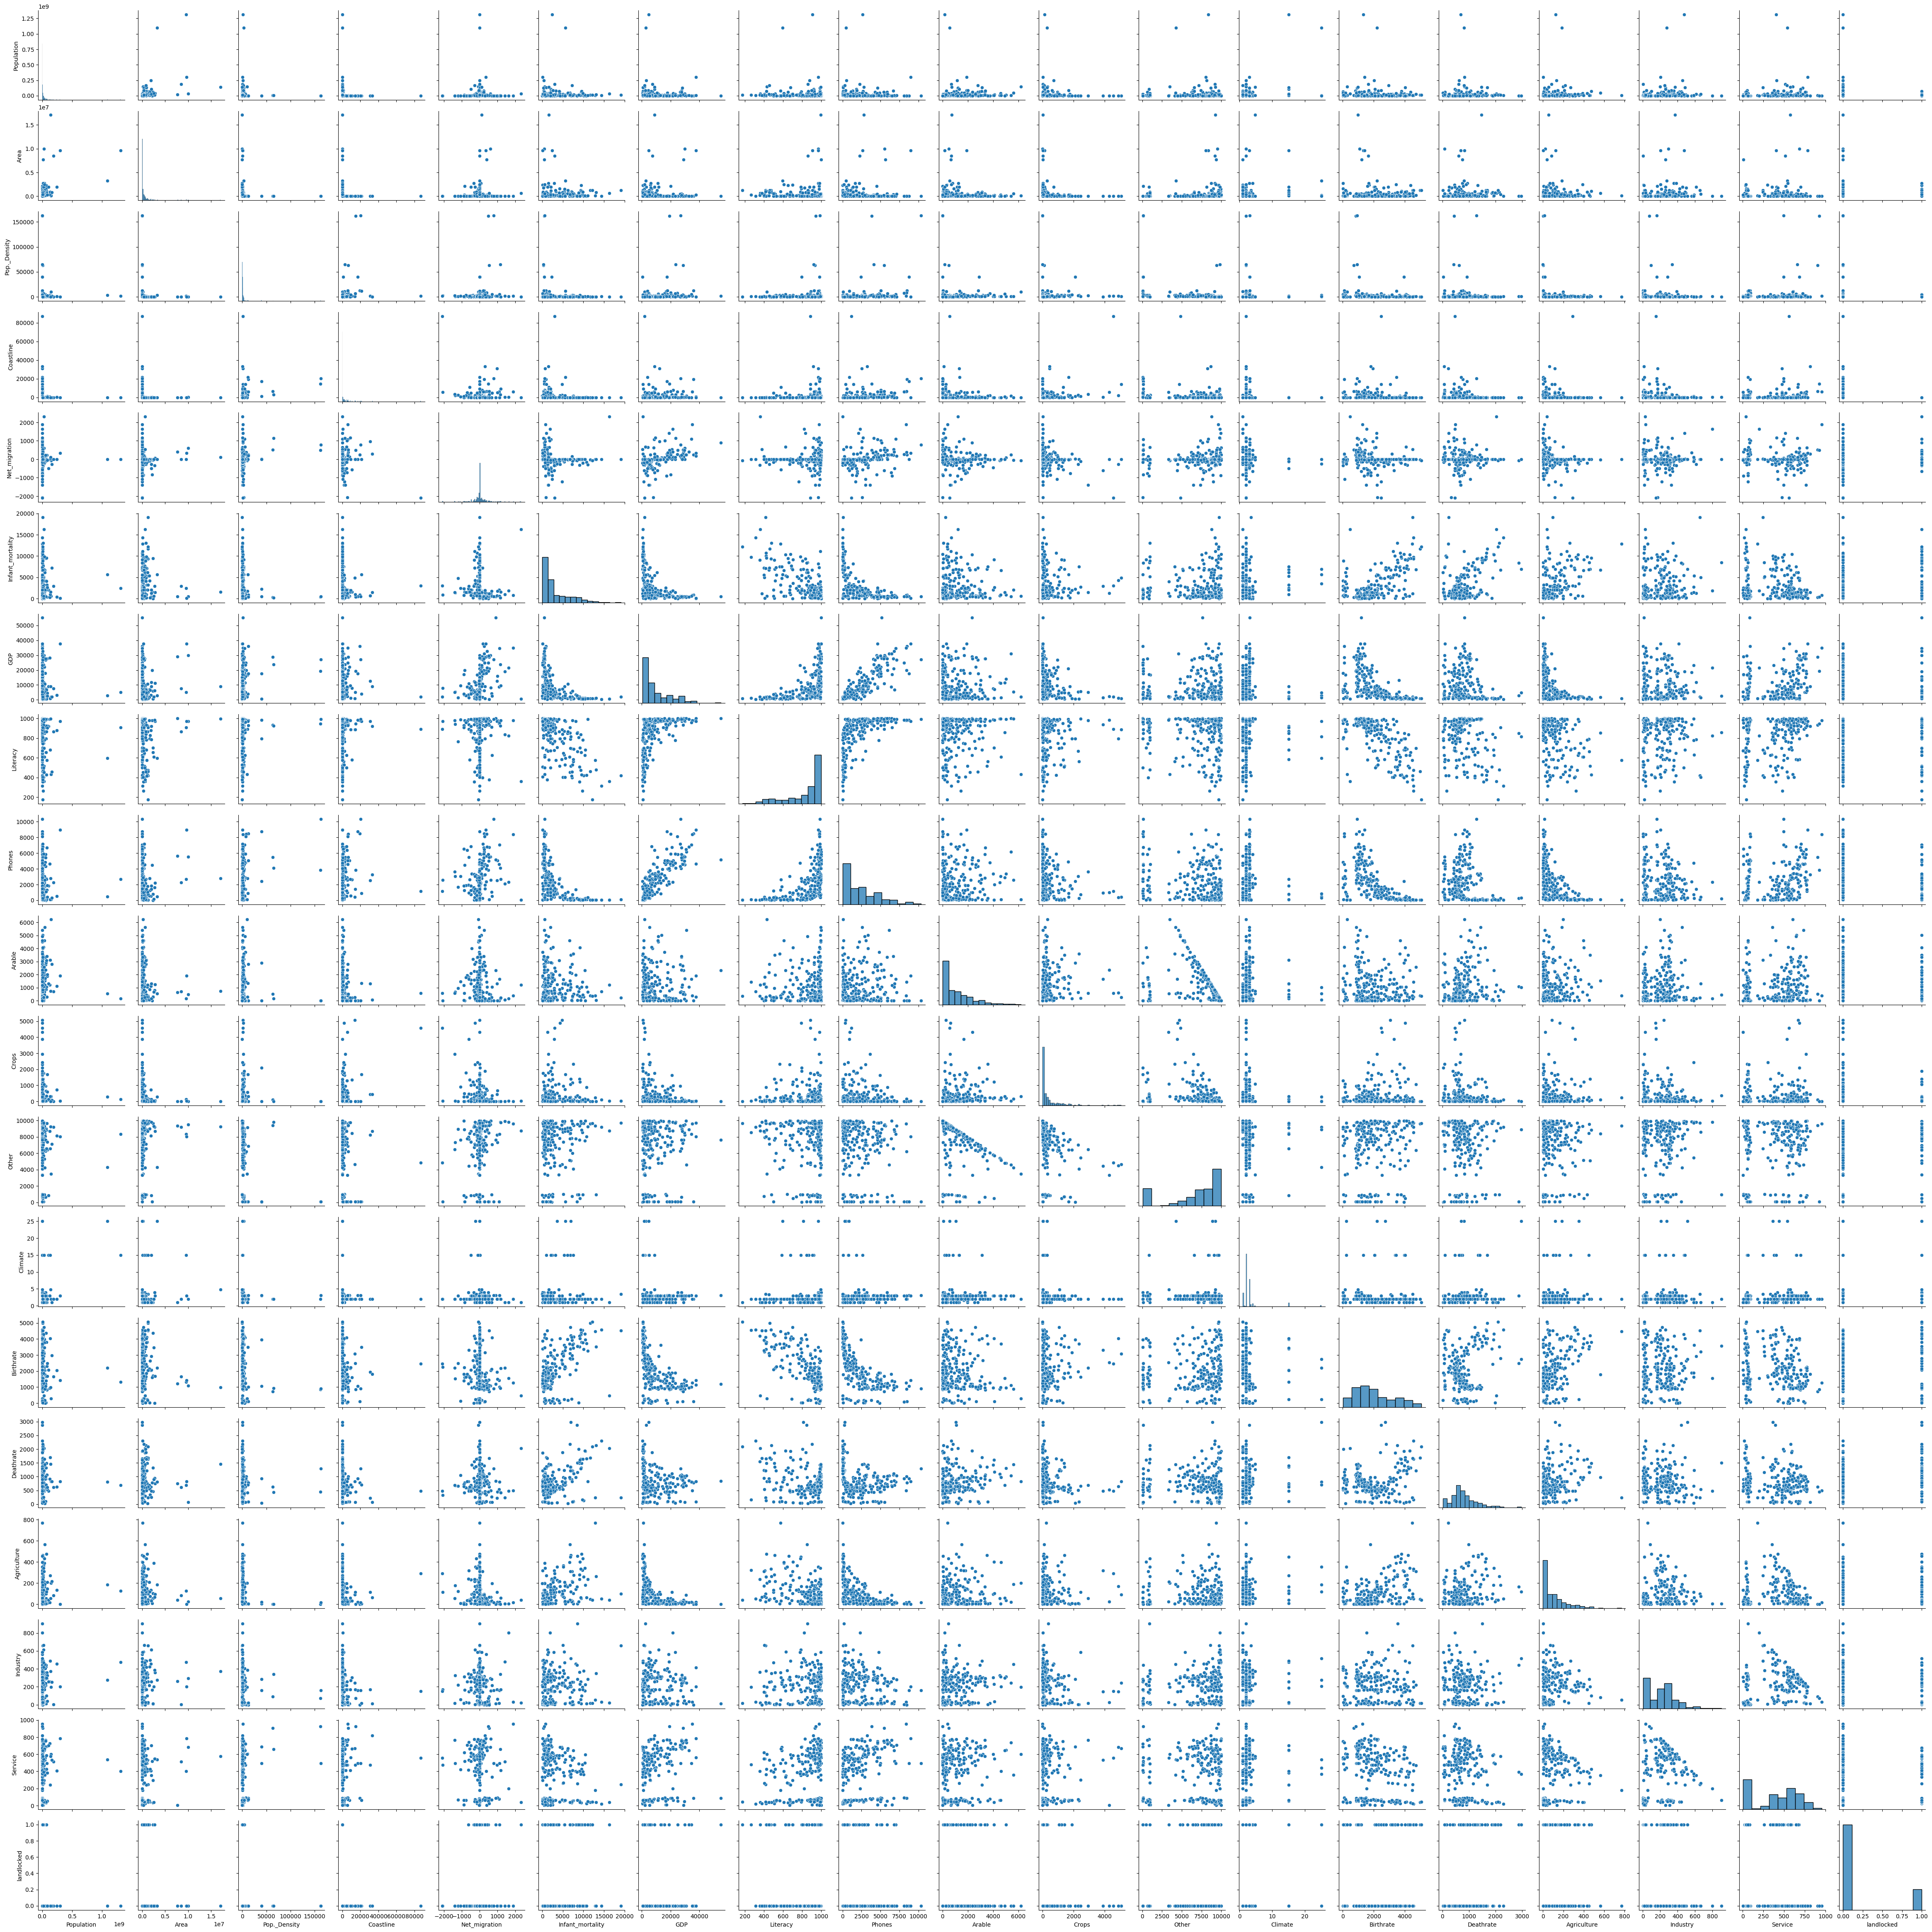

In [143]:
sns.pairplot(countries)

This is too much and too cluttered to visualise - we opt for a much more concise version via a heatmap 

In [148]:
## First, get the correlations matrix via the built in method corr()
correlation_mat = numeric_data_subset.corr()
print(correlation_mat.shape) ## 19 by 19, since we have 19 columns
print(correlation_mat[0:5])


(19, 19)
               Population      Area  Pop._Density  Coastline  Net_migration  \
Population       1.000000  0.469985     -0.028190  -0.068199       0.002400   
Area             0.469985  1.000000     -0.066917  -0.095627       0.046762   
Pop._Density    -0.028190 -0.066917      1.000000   0.241690       0.177022   
Coastline       -0.068199 -0.095627      0.241690   1.000000      -0.140475   
Net_migration    0.002400  0.046762      0.177022  -0.140475       1.000000   

               Infant_mortality       GDP  Literacy    Phones    Arable  \
Population             0.008984 -0.038853 -0.049303 -0.029876  0.015950   
Area                  -0.017336  0.072497  0.029462  0.054151 -0.085866   
Pop._Density          -0.130429  0.196099  0.097432  0.280596 -0.067870   
Coastline             -0.113211  0.049625  0.127801  0.153218 -0.125827   
Net_migration         -0.030724  0.372902 -0.007832  0.223897 -0.074251   

                  Crops     Other   Climate  Birthrate  Deathrate

<Axes: >

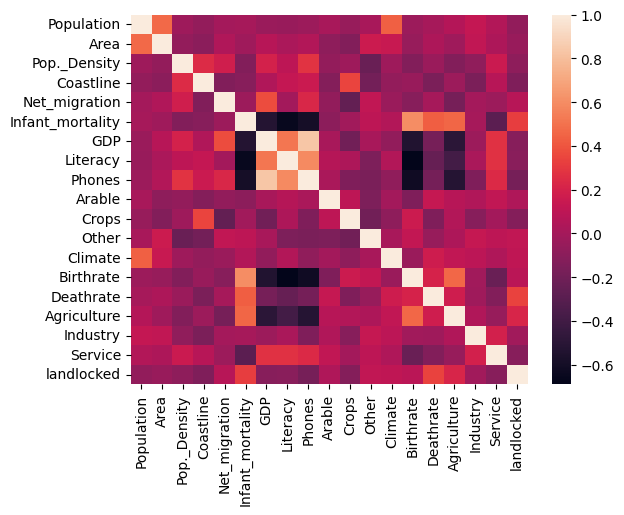

In [149]:
sns.heatmap(correlation_mat)

In [150]:
## An analysis of the correlation coefficients 
all_corr = (correlation_mat.where(np.triu(np.ones(correlation_mat.shape), k=1).astype(bool))
                  .stack())
print("The lowest correlation pairs are ")
print("=======================")
print(all_corr.sort_values(ascending=True).head(5))
print("=======================")
print("The highest correlation pairs are ")
print("=======================")
print(all_corr.sort_values(ascending=True).tail(5))
print("=======================")

The lowest correlation pairs are 
Literacy          Birthrate   -0.689543
Infant_mortality  Literacy    -0.651334
Phones            Birthrate   -0.616967
Infant_mortality  Phones      -0.592903
GDP               Birthrate   -0.542198
dtype: float64
The highest correlation pairs are 
Population        Area         0.469985
GDP               Literacy     0.515455
Literacy          Phones       0.590145
Infant_mortality  Birthrate    0.603431
GDP               Phones       0.830684
dtype: float64


We see that for the pairs of variables with the highest magnitudes of correlation, each are correlated but are each valuable information that may be lost if we chose to exclude any of them due to mutlicollinearity. 

Now, we proceed to standardising the data. As mentioned by sklearn, this will help to 'even the playing field' for all variables and prevent any one from 'dominating the objective function' due to scale. 

In [151]:
## Use Standard Scaler from skleanr 
scaler = StandardScaler()
numeric_data_subset_scaled = scaler.fit_transform(numeric_data_subset)

## Check output
type(numeric_data_subset_scaled) ## is not an np.array 
numeric_data_subset_scaled = pd.DataFrame(numeric_data_subset_scaled, columns= numeric_data_subset.columns)
## Check again
print(numeric_data_subset_scaled.head())

## Check that data has been scaled successfully 
print(numeric_data_subset_scaled.mean(axis = 0))
print(numeric_data_subset_scaled.std(axis = 0))

   Population      Area  Pop._Density  Coastline  Net_migration  \
0    0.019695  0.027583     -0.199844  -0.293443       4.852624   
1   -0.213877 -0.318797     -0.153603  -0.275974      -1.064261   
2    0.035618  0.998421     -0.220490  -0.292889      -0.104537   
3   -0.243834 -0.334779     -0.053514   0.514709      -4.400039   
4   -0.243720 -0.334629     -0.137002  -0.293443       0.117425   

   Infant_mortality       GDP  Literacy    Phones    Arable     Crops  \
0          3.789050 -0.896340 -2.466929 -1.027952  0.039439 -0.481530   
1         -0.287313 -0.516670  0.162033 -0.726675  0.747141  0.036493   
2         -0.898119 -0.366800 -0.696935 -0.696105 -0.664314 -0.477829   
3         -0.640089 -0.166974  0.708649  0.107595 -0.910746 -0.490163   
4         -0.790415  0.932071  0.864825  1.160734 -0.743298 -0.508664   

      Other   Climate  Birthrate  Deathrate  Agriculture  Industry   Service  \
0  0.605976 -0.562941  -1.288664   2.424032    -0.552224 -1.162432 -1.448097  

Now, we can perform clustering! We will use the KMeans method via sklearn.cluster.KMeans

However, the arguably most important argument is the number of clusters. How do we know the number of clusters to use? 

Contextual: We know that there are 7 continents, and a certain number of 'Regions' defined in this dataset (which is 11). We can try out these two values

## Elbow method: selecting optimal number of clusters

Methodological: We can use the Elbow method, which is the general method used to find the optimal number of groupings based on within clusters sum of errors. 

In [152]:
number_regions = len(countries.Region.unique())
print(number_regions)

11


In [153]:
## Elbow method 

## Initialise the within clusters sum of squares list (collector) 
wcss = []

## Iterate through the different possible values of clusters by running the clustering algo 
for i in range(2,10):
    kmeans = KMeans(n_clusters= i,
                    init = 'k-means++',
                    random_state = 42) ## for repeatibility 
    ## Fit the data to the kmeans
    kmeans.fit(numeric_data_subset_scaled)
    
    ## Append the WCSS into the collector list
    wcss.append(kmeans.inertia_)

## Print results
print(wcss)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[3633.4563965372017, 3323.584369770981, 3053.3545409216367, 2891.662627099989, 2715.98920874523, 2549.270550395926, 2415.096312880598, 2274.154782630191]


We then visualise this Elbow method

Text(0.5, 1.0, 'Elbow method')

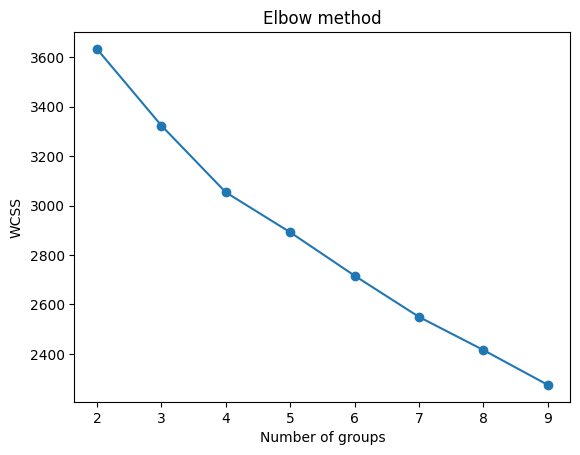

In [154]:
plt.plot(range(2,10), wcss, marker = 'o')
plt.xlabel("Number of groups")
plt.ylabel("WCSS")
plt.title("Elbow method")

There is also a Python package yellowbrick which visualises the elbow

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

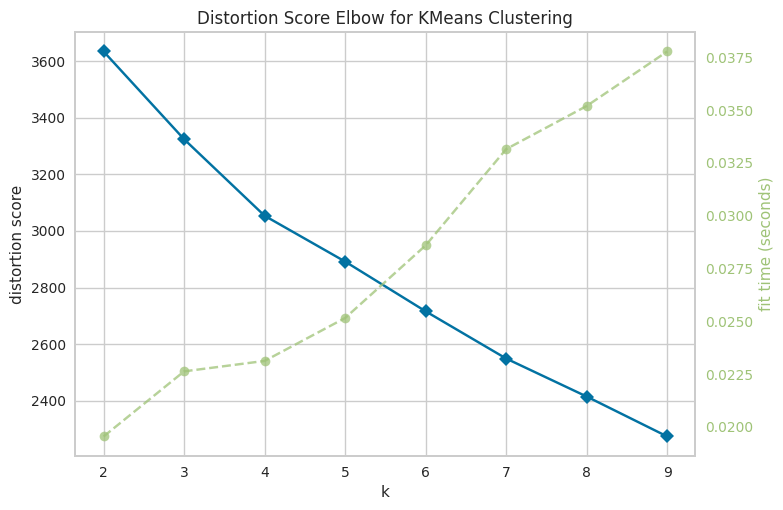

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [155]:
from yellowbrick.cluster import KElbowVisualizer

## Initialise the object (Python style )
km = KMeans(random_state=42)
visualiser = KElbowVisualizer(km, k = (2,10))

## Fit the KMeans visualiser to the object
visualiser.fit(numeric_data_subset_scaled)

## Plot the Elbow plot
visualiser.show()

Unfortunately, we do not see any 'Elbow' so to speak, or a drastic inflexion point that indicates an optimal number of clusters. 

## Alternative: Silhouette Score

We try another metric: silhouette score, which measures how good the clustering is. 

The Silhouette Score ranges from -1 to 1. When the score is 1, the points are perfectly clustered and the clusters are clearly distinguishable from one another, implying that there is true clustering that is being captured. When -1, the points are wrongly clustered, and when 0, the clusters are overlapping. 



In [156]:
from sklearn.metrics import silhouette_score

In [157]:
## Like the Elbow method, we need to iteratively fit a KMeans object by a varying number of clusters
## As with WCSS, we collect the silhouette score per number of cluster
silhouette_per_num_cluser = []

## Iterate through the number of clusters and fit the object
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,
                    init = 'k-means++',
                    random_state=42)
    kmeans.fit(numeric_data_subset_scaled)
    labels = kmeans.labels_ ## We need this to help calculate the distances between the point and its fellow
    # cluster neighbours (same label), and distances with other points of different clusters (different labels)

    ## Get the silhouette score via the imported function from sklearn.metrics
    silh_score = silhouette_score(numeric_data_subset_scaled, labels)

    silhouette_per_num_cluser.append(silh_score)


## Check result
print(silhouette_per_num_cluser)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[0.18042831579865506, 0.125011312546911, 0.12896604931093597, 0.12940757178918902, 0.10535522289770735, 0.11396665288077779, 0.13108965427516223, 0.12390721530502961]


Text(0.5, 1.0, 'Using Silhouette Scores to choose number of clusters')

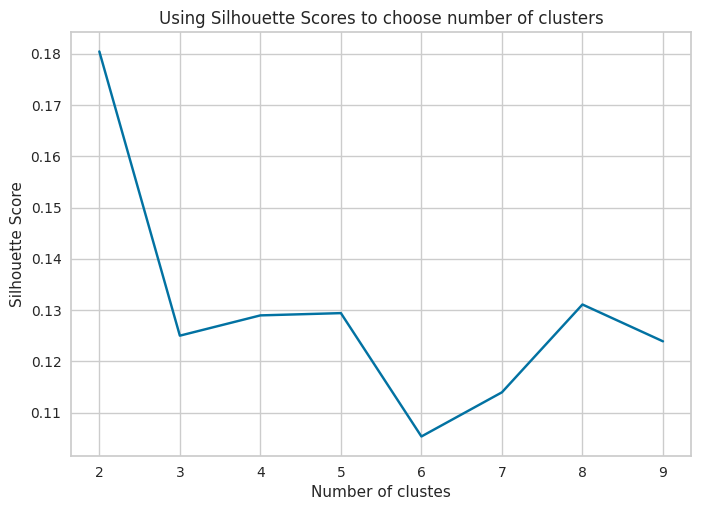

In [158]:
## Visualise 
plt.plot(range(2,10), silhouette_per_num_cluser)
plt.xlabel('Number of clustes')
plt.ylabel('Silhouette Score')
plt.title('Using Silhouette Scores to choose number of clusters')

It looks like 5 clusters is decent, and the score takes a hit going to 6 and 7, implying that the clustering is not ideal then. 


In [159]:
## Init 
kmeans_5_clusters = KMeans(n_clusters=5, 
                           init = 'k-means++',
                           random_state=42)
## Fit
kmeans_5_clusters.fit(numeric_data_subset_scaled)

## See the clustering 
print(kmeans_5_clusters.cluster_centers_)



[[ 1.80445243e+00  1.37415552e+00 -1.81869962e-01 -2.89584515e-01
  -1.72359200e-01  3.43772331e-01 -5.98265592e-01 -4.79371752e-02
  -6.46519622e-01 -2.53396349e-01 -3.79055689e-01  3.13842864e-01
   3.85179258e+00  1.51321322e-01  5.40911682e-01  4.88963844e-01
   4.12745925e-01  3.68066852e-02  1.42088295e-01]
 [-9.74889579e-02 -1.15574357e-01 -1.17409256e-01 -8.86990561e-02
  -4.03728550e-01 -2.59900009e-01 -3.88262231e-01  1.91143147e-01
  -2.28349680e-01  1.88101990e-01  2.61465131e-01 -1.03861893e-01
  -2.31871485e-01 -1.57302171e-01 -3.49350106e-01 -7.89318712e-02
   2.68869228e-02 -4.30123619e-02 -1.25479180e-01]
 [-8.91948888e-02 -4.25838851e-02 -1.88585828e-01 -2.88425135e-01
   4.39431228e-02  1.48016714e+00 -8.11196453e-01 -1.37233949e+00
  -9.84147581e-01 -1.45007133e-01 -2.23188636e-01  1.50599209e-01
  -2.91552845e-01  1.28323974e+00  1.06201362e+00  9.70017335e-01
  -3.10056930e-02 -5.04249622e-01  5.54544086e-01]
 [-1.12003216e-01 -3.40121340e-02  3.62560400e-01  2.21

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


However, the lists of vectors do not quite make sense to us, since we dont know which variable each value is referring to and the data has also been scaled. Let us un-scale and add back in the column names. 

In [160]:
## Use the same standardscaler object now to reverse transform
unscaled_cluster_centers = scaler.inverse_transform(kmeans_5_clusters.cluster_centers_)
## See results
print(unscaled_cluster_centers)

[[ 2.41000492e+08  3.05292842e+06  7.77750000e+02  2.78333333e+01
  -7.10833333e+01  4.34341667e+03  3.68333333e+03  8.24666667e+02
   8.92916667e+02  8.42250000e+02  1.05083333e+02  7.82341667e+03
   1.66500000e+01  2.22308333e+03  1.08758333e+03  1.66083333e+02
   2.85583333e+02  4.21666667e+02  2.50000000e-01]
 [ 1.72725249e+07  3.91772490e+05  1.84555769e+03  1.47676923e+03
  -1.80533300e+02  2.24718978e+03  5.78519231e+03  8.70591851e+02
   1.83675198e+03  1.40121750e+03  6.24401923e+02  6.47709923e+03
   2.17362447e+00  1.84649803e+03  6.40156395e+02  9.62227671e+01
   2.21505296e+02  4.01043173e+02  1.44230769e-01]
 [ 1.82481676e+07  5.22157891e+05  6.66500000e+02  3.61956522e+01
   3.12391304e+01  8.28950000e+03  1.55217391e+03  5.70260870e+02
   1.30869565e+02  9.79478261e+02  2.31456522e+02  7.29726087e+03
   1.96205717e+00  3.60426087e+03  1.34947826e+03  2.25260870e+02
   2.11891304e+02  2.81869565e+02  4.13043478e-01]
 [ 1.55651929e+07  5.37469906e+05  9.79637500e+03  3.71

In [161]:
## Add back in the names
dataframe_cluster_centers = pd.DataFrame(unscaled_cluster_centers, 
                                         columns=numeric_data_subset.columns)

## Check
dataframe_cluster_centers

,Population,Area,Pop._Density,Coastline,Net_migration,Infant_mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,landlocked
0,2.410005e+08,3.052928e+06,777.750000,27.833333,-71.083333,4343.416667,3683.333333,824.666667,892.916667,842.250000,105.083333,7823.416667,16.650000,2223.083333,1087.583333,166.083333,285.583333,421.666667,0.250000
1,1.727252e+07,3.917725e+05,1845.557692,1476.769231,-180.533300,2247.189777,5785.192308,870.591851,1836.751983,1401.217500,624.401923,6477.099231,2.173624,1846.498033,640.156395,96.222767,221.505296,401.043173,0.144231
2,1.824817e+07,5.221579e+05,666.500000,36.195652,31.239130,8289.500000,1552.173913,570.260870,130.869565,979.478261,231.456522,7297.260870,1.962057,3604.260870,1349.478261,225.260870,211.891304,281.869565,0.413043
3,1.556519e+07,5.374699e+05,9796.375000,3715.687500,354.109375,700.171875,23064.062500,964.532269,5078.642708,977.432292,190.637731,6847.825810,2.529514,1183.578125,671.765625,21.805523,201.649936,519.782249,0.109375
4,1.080040e+05,7.020000e+02,1539.000000,87066.000000,-2099.000000,3021.000000,2000.000000,890.000000,1148.000000,571.000000,4571.000000,4858.000000,2.000000,2468.000000,475.000000,289.000000,152.000000,559.000000,0.000000


In [162]:
## See which countries are in each cluster
cluster_labels = kmeans_5_clusters.labels_

## Add to the original dataset
countries['cluster_labels'] = cluster_labels

## Check
country_and_cluster_df = countries[['Country', 'cluster_labels', 'Region']].sort_values('cluster_labels')

In [163]:
## Try to get a sample of 5 countries per cluster
country_and_cluster_df.groupby('cluster_labels').head()

,Country,cluster_labels,Region
194,Swaziland,0,SUB-SAHARAN AFRICA
152,Nigeria,0,SUB-SAHARAN AFRICA
94,India,0,ASIA (EX. NEAR EAST)
135,Mexico,0,LATIN AMER. & CARIB
24,Bolivia,0,LATIN AMER. & CARIB
81,Grenada,1,LATIN AMER. & CARIB
171,Saint Helena,1,SUB-SAHARAN AFRICA
172,Saint Kitts & Nevis,1,LATIN AMER. & CARIB
173,Saint Lucia,1,LATIN AMER. & CARIB
139,Mongolia,1,ASIA (EX. NEAR EAST)


In [164]:
country_and_cluster_df.sort_values('cluster_labels')

,Country,cluster_labels,Region
194,Swaziland,0,SUB-SAHARAN AFRICA
35,Cameroon,0,SUB-SAHARAN AFRICA
112,Kyrgyzstan,0,C.W. OF IND. STATES
169,Russia,0,C.W. OF IND. STATES
107,Kenya,0,SUB-SAHARAN AFRICA
...,...,...,...
184,Singapore,3,ASIA (EX. NEAR EAST)
100,Israel,3,NEAR EAST
154,Norway,3,WESTERN EUROPE
14,"Bahamas, The",3,LATIN AMER. & CARIB


<Axes: ylabel='cluster_labels'>

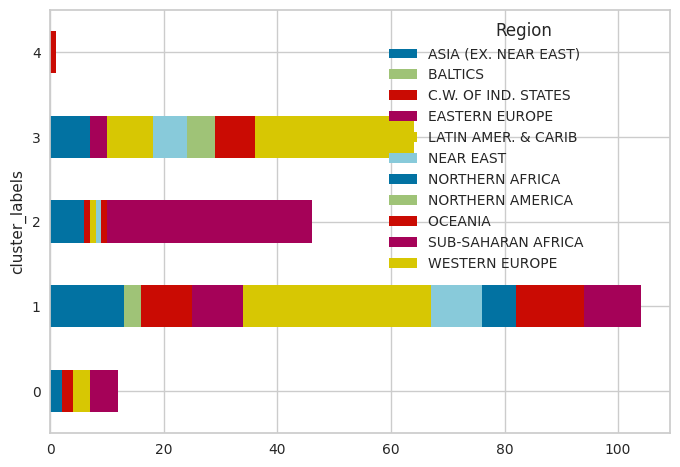

In [165]:
region_by_cluster_df = country_and_cluster_df.groupby('cluster_labels').Region.value_counts().unstack()
region_by_cluster_df.plot(kind = 'barh',
                          stacked=True)



Here we can see that the 4th cluster only contains one Oceanic country (Micronesia). Cluster 3 contains a lot of the Western Europe, cluster 2 contains a disproportionate amount of SubSaharan Africa. Cluster 1 contains a slightly more even distribution across all regions but the largest region is Latin America. Finally, cluster 0 contains a small amount but quite an even spread between Asia, Commonwealth, Latin American and SubSaharan countries.

Text(0.5, 1.0, 'GDP across clusters')

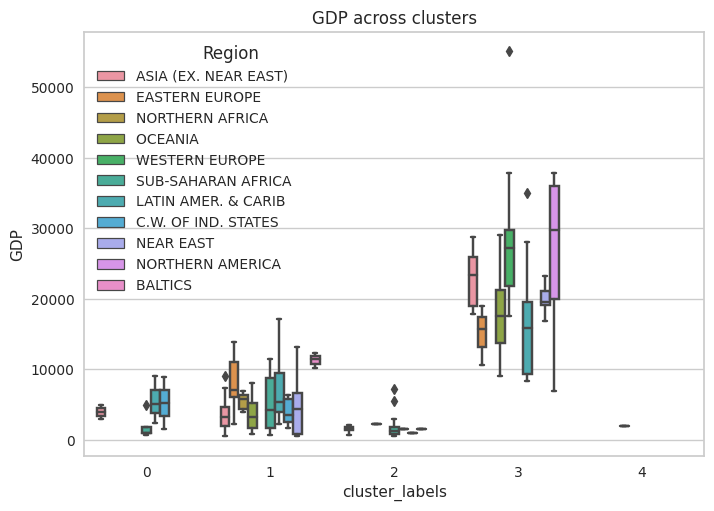

In [166]:
sns.boxplot(y = countries.GDP, x = countries.cluster_labels,
            hue = countries.Region)
plt.title('GDP across clusters')

Cluster 3 contains the richest countries by GDP, and on the opposite end cluster 4 and 2 are the poorest regions. 